# SEA LEVEL PREDICTOR 

You will analyze a dataset of the global average sea level change since 1880. You will use the data to predict the sea level change through year 2050.

Use the data to complete the following tasks:

- Use Pandas to import the data from epa-sea-level.csv. **OKAY**
- Use matplotlib to create a scatter plot using the Year column as the x-axis and the CSIRO Adjusted Sea Level column as the y-axis. **OKAY**
- Use the linregress function from scipy.stats to get the slope and y-intercept of the line of best fit. Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the sea level rise in 2050.
- Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset. Make the line also go through - the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000.
- The x label should be Year, the y label should be Sea Level (inches), and the title should be Rise in Sea Level.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [5]:
help(stats.linregress)

Help on function linregress in module scipy.stats._stats_mstats_common:

linregress(x, y=None, alternative='two-sided')
    Calculate a linear least-squares regression for two sets of measurements.
    
    Parameters
    ----------
    x, y : array_like
        Two sets of measurements.  Both arrays should have the same length.  If
        only `x` is given (and ``y=None``), then it must be a two-dimensional
        array where one dimension has length 2.  The two sets of measurements
        are then found by splitting the array along the length-2 dimension. In
        the case where ``y=None`` and `x` is a 2x2 array, ``linregress(x)`` is
        equivalent to ``linregress(x[0], x[1])``.
    alternative : {'two-sided', 'less', 'greater'}, optional
        Defines the alternative hypothesis. Default is 'two-sided'.
        The following options are available:
    
        * 'two-sided': the slope of the regression line is nonzero
        * 'less': the slope of the regression line is l

In [6]:
df = pd.read_csv("epa-sea-level.csv")

Use the linregress function from scipy.stats to get the slope and y-intercept of the line of best fit.

Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the sea level rise in 2050.

In [17]:
regressionline = stats.linregress(df["Year"], df["CSIRO Adjusted Sea Level"])

In [18]:
print(regressionline)
slope = regressionline.slope
y_intercept = regressionline.intercept
regressionline.rvalue
regressionline.pvalue
regressionline.stderr
regressionline.intercept_stderr

LinregressResult(slope=0.0630445840121348, intercept=-119.06594196773978, rvalue=0.984757131182585, pvalue=3.7886969791131554e-102, stderr=0.000969211871328715, intercept_stderr=1.8869433812425225)


<AxesSubplot: title={'center': 'Rise in Sea Level'}, xlabel='Year', ylabel='CSIRO Adjusted Sea Level'>

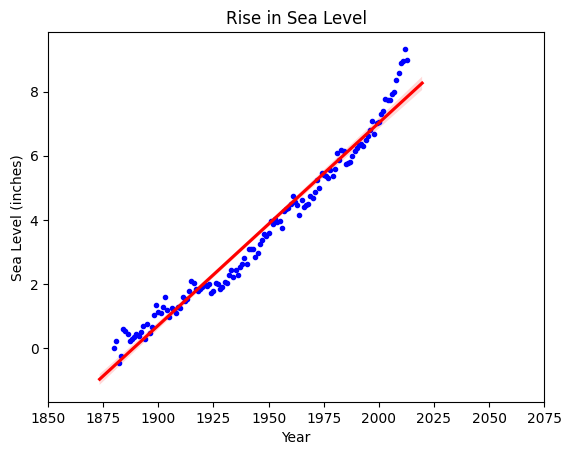

In [43]:
# SCATTER PLOT
fig1, ax1 = plt.subplots(1)
ax1.plot(df["Year"], df["CSIRO Adjusted Sea Level"], "b.")  # Normal scatter plot

sns.regplot(
    x=df["Year"],
    y=df["CSIRO Adjusted Sea Level"],
    marker=".",
    color="r",
    ax=ax1,
    scatter=False,
    truncate=False,
)
# Scatter plot + Regression line
ax1.set_title("Rise in Sea Level")
ax1.set_xlabel("Year")
ax1.set_ylabel("Sea Level (inches)")
ax1.set_xticks(
    [
        int(i)
        for i in [
            1850.0,
            1875.0,
            1900.0,
            1925.0,
            1950.0,
            1975.0,
            2000.0,
            2025.0,
            2050.0,
            2075.0,
        ]
    ]
)
ax1.set_xticklabels(
    [
        int(i)
        for i in [
            1850.0,
            1875.0,
            1900.0,
            1925.0,
            1950.0,
            1975.0,
            2000.0,
            2025.0,
            2050.0,
            2075.0,
        ]
    ]
);

Now I'm gonna extend the regression line up to the year 2050.

In [45]:
# y = slope * x + y_intercept

A = [
    7.06107985777146,
    7.227507131103323,
    7.393934404435242,
    7.560361677767105,
    7.726788951098968,
    7.89321622443083,
    8.059643497762693,
    8.226070771094555,
    8.392498044426418,
    8.55892531775828,
    8.725352591090143,
    8.891779864422006,
    9.058207137753925,
    9.224634411085788,
    9.39106168441765,
    9.557488957749513,
    9.723916231081375,
    9.890343504413238,
    10.0567707777451,
    10.223198051076963,
    10.389625324408826,
    10.556052597740688,
    10.72247987107255,
    10.88890714440447,
    11.055334417736333,
    11.221761691068195,
    11.388188964400058,
    11.55461623773192,
    11.721043511063783,
    11.887470784395646,
    12.053898057727508,
    12.220325331059371,
    12.386752604391233,
    12.553179877723153,
    12.719607151055015,
    12.886034424386878,
    13.05246169771874,
    13.218888971050603,
    13.385316244382466,
    13.551743517714328,
    13.718170791046191,
    13.884598064378054,
    14.051025337709916,
    14.217452611041836,
    14.383879884373698,
    14.55030715770556,
    14.716734431037423,
    14.883161704369286,
    15.049588977701148,
    15.216016251033011,
    15.382443524364874,
]

In [48]:
len(A)
df.tail()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058
133,2013,8.980315,8.622047,9.338583,8.546648
